In [ ]:
pip install pandas_datareader

In [ ]:
pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as df
from pandas_datareader import data as pdr
import yfinance as yfin

In [ ]:
yfin.pdr_override()

In [ ]:
start = "2010-01-01"
end = "2023-10-01"
df =pdr.get_data_yahoo("AAPL",start,end)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425994,447610800


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400
2023-09-29,172.020004,173.070007,170.339996,171.210007,171.210007,51814200


In [ ]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425994,447610800


In [ ]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


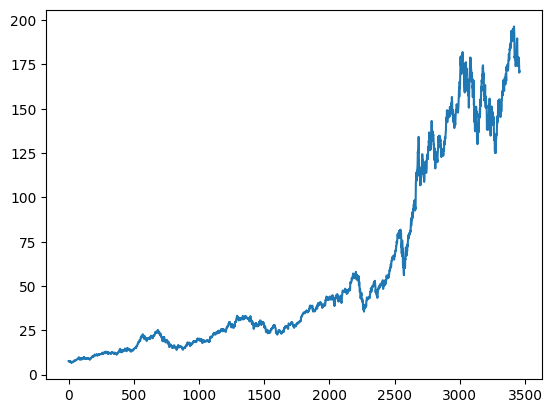

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3454,174.199997,176.970001,174.149994,176.080002,46172700
3455,174.820007,175.199997,171.660004,171.960007,64588900
3456,172.619995,173.039993,169.050003,170.429993,66921800
3457,169.339996,172.029999,167.619995,170.690002,56294400


In [ ]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3454    181.984400
3455    182.029501
3456    182.075901
3457    182.047101
3458    182.024201
Name: Close, Length: 3459, dtype: float64

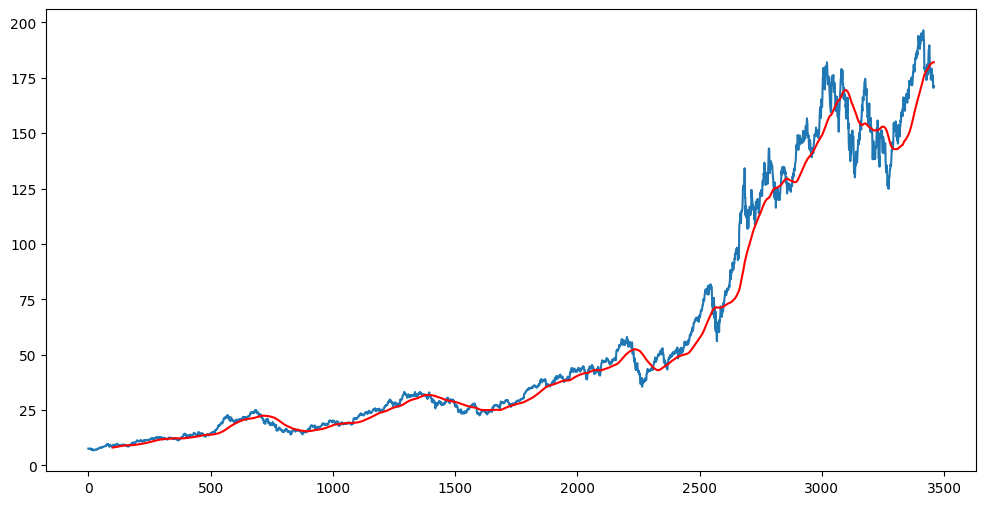

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3454    165.65180
3455    165.80690
3456    165.94580
3457    166.08845
3458    166.22205
Name: Close, Length: 3459, dtype: float64

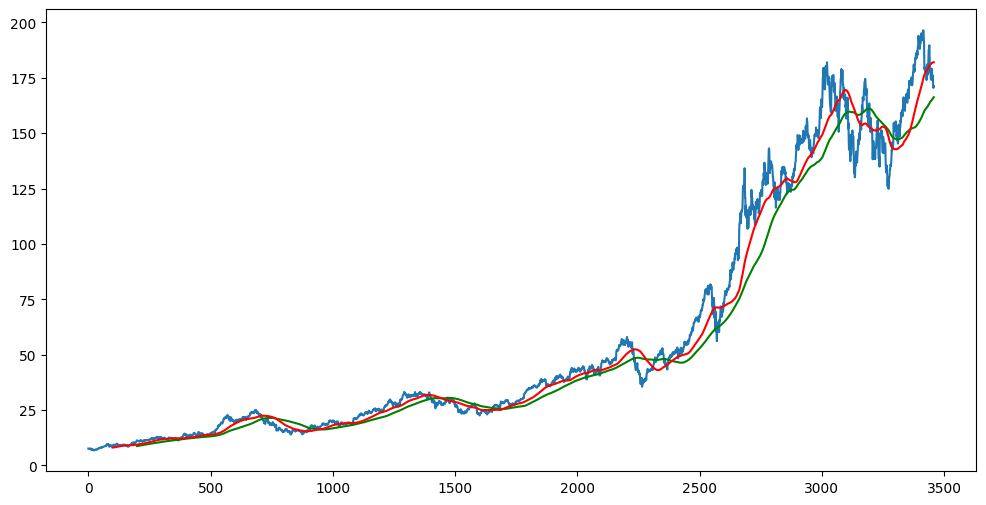

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

In [ ]:
df.shape

(3459, 5)

In [ ]:
#Split data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][0:int(len(df)*0.30)])
print(data_training.shape)
print(data_testing.shape)

(2421, 1)
(1037, 1)


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
#import min-max scaler for scaling down data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.88711566],
       [0.85671997],
       [0.85178436]])

In [ ]:
data_training_array.shape

(2421, 1)

In [ ]:
#Divide the data in xtrain and ytrain

x_train=[]
y_train=[]

 #[0] because 1757 is at 0 index
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])


In [ ]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2321, 100, 1)

In [ ]:
#ML Model

In [ ]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
     #Baher cha 1 is the column that we are using(Close wala) if we add more then that will only change
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
73/73 [==============================] - 45s 424ms/step - loss: 0.0310
Epoch 2/50
73/73 [==============================] - 26s 352ms/step - loss: 0.0079
Epoch 3/50
73/73 [==============================] - 24s 328ms/step - loss: 0.0071
Epoch 4/50
73/73 [==============================] - 24s 331ms/step - loss: 0.0062
Epoch 5/50
73/73 [==============================] - 23s 319ms/step - loss: 0.0060
Epoch 6/50
73/73 [==============================] - 24s 323ms/step - loss: 0.0053
Epoch 7/50
73/73 [==============================] - 24s 326ms/step - loss: 0.0054
Epoch 8/50
73/73 [==============================] - 22s 306ms/step - loss: 0.0047
Epoch 9/50
73/73 [==============================] - 24s 335ms/step - loss: 0.0048
Epoch 10/50
73/73 [==============================] - 25s 338ms/step - loss: 0.0044
Epoch 11/50
73/73 [==============================] - 24s 324ms/step - loss: 0.0041
Epoch 12/50
73/73 [==============================] - 22s 305ms/step - loss: 0.0045
Epoch 13/50
7

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_testing.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df=past_100_days.append(data_testing,ignore_index=True)

<ipython-input-38-46277fdece45>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [ ]:
final_df.head()

,Close
0,46.697498
1,47.117500
2,47.180000
3,47.487499
4,47.810001


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.85857007],
       [0.86762163],
       [0.86896858],
       ...,
       [0.26467214],
       [0.27122221],
       [0.2708835 ]])

In [ ]:
input_data.shape

(1137, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1037, 100, 1)
(1037,)


In [ ]:
#Making Predictions

y_predicted=model.predict(x_test)

33/33 [==============================] - 3s 87ms/step


In [ ]:
y_predicted.shape

(1037, 1)

In [ ]:
y_test

array([0.01690231, 0.0171871 , 0.01456247, ..., 0.26467214, 0.27122221,
       0.2708835 ])

In [ ]:
y_predicted

array([[0.8519238 ],
       [0.84558654],
       [0.82938325],
       ...,
       [0.30167353],
       [0.30107588],
       [0.3011618 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.02155123])

In [ ]:
scale_factor=1/0.02155123
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

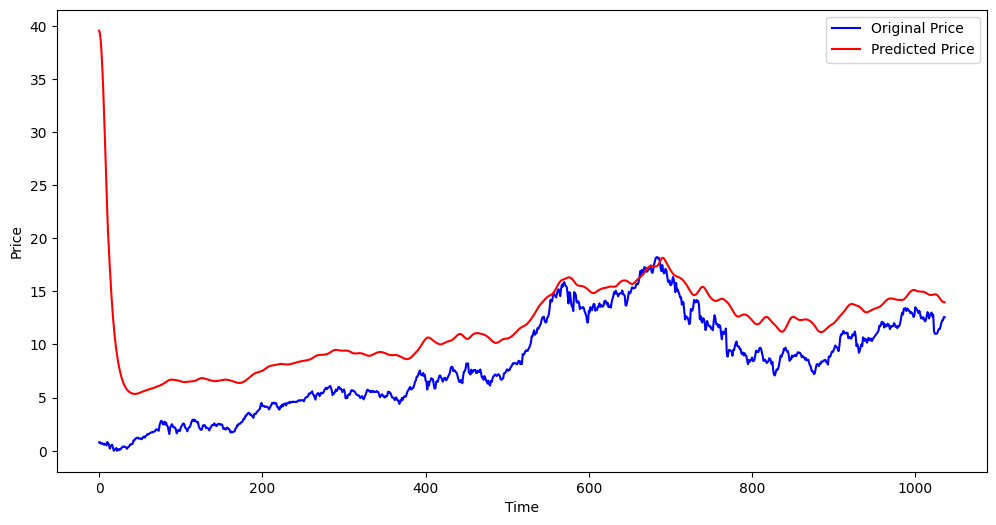

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()